In [1]:
# must go first 
%matplotlib inline 
%config InlineBackend.figure_format='retina'

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

# system packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# basic wrangling 
import numpy as np
import pandas as pd
import yaml 
import json 
import re 

# eda tools 
import pivottablejs
import missingno as msno

# File with functions from prior notebook(s)
sys.path.append('../../scripts/')

# Update matplotlib defaults to something nicer 
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[12.0,8.0],
              'axes.labelsize':20,
              
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385',
              'font.family': 'sans-serif',
              'font.sans-serif': 'Tahoma'}
mpl.rcParams.update(mpl_update)

## Load data

In [2]:
dataplus = lambda x: os.path.join("../data/", x)

### Artworks

In [3]:
works = pd.read_csv(dataplus("Artworks.csv"))

In [4]:
works.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [5]:
works.loc[works[works.DateAcquired=="1216-10-18"].index, "DateAcquired"] = "2016-10-18"

In [6]:
works.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

### Artists

In [7]:
artists = pd.read_csv(dataplus("Artists.csv"))

In [8]:
artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

### Directors

In [10]:
heads = pd.read_csv(dataplus("MoMADirectorsDepartmentHeads.csv"))

In [11]:
heads.head()

,DepartmentFullName,DepartmentBeginYear,DepartmentEndYear,ConstituentID,DisplayName,PositionNote,PositionBeginYear,PositionEndYear,ConstituentType,AlphaSort,...,LastName,Suffix,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID
0,The Museum of Modern Art,1929,NaN,9168.0,"Alfred H. Barr, Jr.",Director,1929,1943.0,Individual,Barr Alfred H. Jr.,...,Barr,Jr.,American,1902.0,1981.0,"American, 1902–1981",Male,109252853.0,Q711362,500241556.0
1,The Museum of Modern Art,1929,NaN,10779.0,René d'Harnoncourt,Director,1949,1968.0,Individual,d'Harnoncourt René,...,d'Harnoncourt,NaN,American,1901.0,1968.0,"American, 1901–1968",Male,176768.0,Q7312958,500071210.0
2,The Museum of Modern Art,1929,NaN,11389.0,Bates Lowry,Director,1968,1969.0,Individual,Lowry Bates,...,Lowry,NaN,American,1924.0,2004.0,"American, 1924–2004",Male,71883331.0,Q4868805,500279878.0
3,The Museum of Modern Art,1929,NaN,NaN,John B. Hightower,Director,1970,1972.0,Individual,Hightower John B.,...,Hightower,NaN,American,1933.0,2013.0,"American, 1933–2013",Male,65771126.0,Q15431531,NaN
4,The Museum of Modern Art,1929,NaN,13047.0,Richard E. Oldenburg,Director,1972,1994.0,Individual,Oldenburg Richard E.,...,Oldenburg,NaN,American,1933.0,NaN,"American, born 1933",Male,22054670.0,Q7328159,NaN


In [12]:
heads.columns

Index(['DepartmentFullName', 'DepartmentBeginYear', 'DepartmentEndYear',
       'ConstituentID', 'DisplayName', 'PositionNote', 'PositionBeginYear',
       'PositionEndYear', 'ConstituentType', 'AlphaSort', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'Nationality',
       'ConstituentBeginDate', 'ConstituentEndDate', 'ArtistBio', 'Gender',
       'VIAFID', 'WikidataID', 'ULANID'],
      dtype='object')

## Acquisitions by director

### Look at directors only

In [13]:
heads.set_index("DisplayName", inplace=True)

In [14]:
directors = heads[heads.DepartmentFullName=="The Museum of Modern Art"]

In [15]:
directors["duration_years"] = directors.PositionEndYear - directors.PositionBeginYear

In [16]:
directors.loc["Glenn D. Lowry", "duration_years"] = 2018 - directors.loc["Glenn D. Lowry", "PositionBeginYear"]

In [17]:
directors

,DepartmentFullName,DepartmentBeginYear,DepartmentEndYear,ConstituentID,PositionNote,PositionBeginYear,PositionEndYear,ConstituentType,AlphaSort,FirstName,...,Suffix,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,duration_years
DisplayName,,,,,,,,,,,,,,,,,,,,,
"Alfred H. Barr, Jr.",The Museum of Modern Art,1929,NaN,9168.0,Director,1929,1943.0,Individual,Barr Alfred H. Jr.,Alfred,...,Jr.,American,1902.0,1981.0,"American, 1902–1981",Male,109252853.0,Q711362,500241556.0,14.0
René d'Harnoncourt,The Museum of Modern Art,1929,NaN,10779.0,Director,1949,1968.0,Individual,d'Harnoncourt René,René,...,NaN,American,1901.0,1968.0,"American, 1901–1968",Male,176768.0,Q7312958,500071210.0,19.0
Bates Lowry,The Museum of Modern Art,1929,NaN,11389.0,Director,1968,1969.0,Individual,Lowry Bates,Bates,...,NaN,American,1924.0,2004.0,"American, 1924–2004",Male,71883331.0,Q4868805,500279878.0,1.0
John B. Hightower,The Museum of Modern Art,1929,NaN,NaN,Director,1970,1972.0,Individual,Hightower John B.,John,...,NaN,American,1933.0,2013.0,"American, 1933–2013",Male,65771126.0,Q15431531,NaN,2.0
Richard E. Oldenburg,The Museum of Modern Art,1929,NaN,13047.0,Director,1972,1994.0,Individual,Oldenburg Richard E.,Richard,...,NaN,American,1933.0,NaN,"American, born 1933",Male,22054670.0,Q7328159,NaN,22.0
Glenn D. Lowry,The Museum of Modern Art,1929,NaN,30333.0,Director,1995,NaN,Individual,Lowry Glenn D.,Glenn,...,NaN,American,1954.0,NaN,"American, born 1954",Male,165457793.0,Q5568749,500251278.0,23.0


In [18]:
directors[["PositionBeginYear", "PositionEndYear", "Nationality", "ConstituentBeginDate", "ConstituentEndDate", "Gender"]]

,PositionBeginYear,PositionEndYear,Nationality,ConstituentBeginDate,ConstituentEndDate,Gender
DisplayName,,,,,,
"Alfred H. Barr, Jr.",1929,1943.0,American,1902.0,1981.0,Male
René d'Harnoncourt,1949,1968.0,American,1901.0,1968.0,Male
Bates Lowry,1968,1969.0,American,1924.0,2004.0,Male
John B. Hightower,1970,1972.0,American,1933.0,2013.0,Male
Richard E. Oldenburg,1972,1994.0,American,1933.0,NaN,Male
Glenn D. Lowry,1995,NaN,American,1954.0,NaN,Male


### Assign a director to each artwork

In [19]:
works.DateAcquired = pd.to_datetime(works.DateAcquired)

In [20]:
def get_director(year):
    for director in directors.index:
        if year < directors.sort_values(by="PositionBeginYear").loc[director, "PositionEndYear"]:
            return director
    return director

There must be a faster way of doing this but I did not try to find it. 

In [21]:
works["Director"] = works.DateAcquired.apply(lambda x: get_director(x.year))

In [22]:
works.Director.value_counts()

Glenn D. Lowry          61077
René d'Harnoncourt      32013
Richard E. Oldenburg    25661
Bates Lowry              6898
Alfred H. Barr, Jr.      5181
John B. Hightower        4488
Name: Director, dtype: int64

In [23]:
works.to_csv(dataplus("artworks_with_director.csv"))

In [24]:
directors

,DepartmentFullName,DepartmentBeginYear,DepartmentEndYear,ConstituentID,PositionNote,PositionBeginYear,PositionEndYear,ConstituentType,AlphaSort,FirstName,...,Suffix,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,duration_years
DisplayName,,,,,,,,,,,,,,,,,,,,,
"Alfred H. Barr, Jr.",The Museum of Modern Art,1929,NaN,9168.0,Director,1929,1943.0,Individual,Barr Alfred H. Jr.,Alfred,...,Jr.,American,1902.0,1981.0,"American, 1902–1981",Male,109252853.0,Q711362,500241556.0,14.0
René d'Harnoncourt,The Museum of Modern Art,1929,NaN,10779.0,Director,1949,1968.0,Individual,d'Harnoncourt René,René,...,NaN,American,1901.0,1968.0,"American, 1901–1968",Male,176768.0,Q7312958,500071210.0,19.0
Bates Lowry,The Museum of Modern Art,1929,NaN,11389.0,Director,1968,1969.0,Individual,Lowry Bates,Bates,...,NaN,American,1924.0,2004.0,"American, 1924–2004",Male,71883331.0,Q4868805,500279878.0,1.0
John B. Hightower,The Museum of Modern Art,1929,NaN,NaN,Director,1970,1972.0,Individual,Hightower John B.,John,...,NaN,American,1933.0,2013.0,"American, 1933–2013",Male,65771126.0,Q15431531,NaN,2.0
Richard E. Oldenburg,The Museum of Modern Art,1929,NaN,13047.0,Director,1972,1994.0,Individual,Oldenburg Richard E.,Richard,...,NaN,American,1933.0,NaN,"American, born 1933",Male,22054670.0,Q7328159,NaN,22.0
Glenn D. Lowry,The Museum of Modern Art,1929,NaN,30333.0,Director,1995,NaN,Individual,Lowry Glenn D.,Glenn,...,NaN,American,1954.0,NaN,"American, born 1954",Male,165457793.0,Q5568749,500251278.0,23.0


### Number of works by director 

In [25]:
num_works_dir =  works.Director.value_counts()

In [26]:
directors["num_works_acquired"] = num_works_dir[directors.index]

In [27]:
directors["num_works_per_year"] = directors.num_works_acquired.divide(directors.duration_years)

In [28]:
directors.T

DisplayName,"Alfred H. Barr, Jr.",René d'Harnoncourt,Bates Lowry,John B. Hightower,Richard E. Oldenburg,Glenn D. Lowry
DepartmentFullName,The Museum of Modern Art,The Museum of Modern Art,The Museum of Modern Art,The Museum of Modern Art,The Museum of Modern Art,The Museum of Modern Art
DepartmentBeginYear,1929,1929,1929,1929,1929,1929
DepartmentEndYear,NaN,NaN,NaN,NaN,NaN,NaN
ConstituentID,9168,10779,11389,NaN,13047,30333
PositionNote,Director,Director,Director,Director,Director,Director
PositionBeginYear,1929,1949,1968,1970,1972,1995
PositionEndYear,1943,1968,1969,1972,1994,NaN
ConstituentType,Individual,Individual,Individual,Individual,Individual,Individual
AlphaSort,Barr Alfred H. Jr.,d'Harnoncourt René,Lowry Bates,Hightower John B.,Oldenburg Richard E.,Lowry Glenn D.
FirstName,Alfred,René,Bates,John,Richard,Glenn


In [29]:
directors.rename(columns=dict(num_works_acquired = "NumberWorksAcquired", 
                              num_works_per_year = "NumberWorksPerYear", 
                              duration_years="DurationYears"), inplace=True)

In [30]:
directors[["DurationYears", "NumberWorksAcquired", "NumberWorksPerYear"]]

,DurationYears,NumberWorksAcquired,NumberWorksPerYear
DisplayName,,,
"Alfred H. Barr, Jr.",14.0,5181,370.071429
René d'Harnoncourt,19.0,32013,1684.894737
Bates Lowry,1.0,6898,6898.000000
John B. Hightower,2.0,4488,2244.000000
Richard E. Oldenburg,22.0,25661,1166.409091
Glenn D. Lowry,23.0,61077,2655.521739


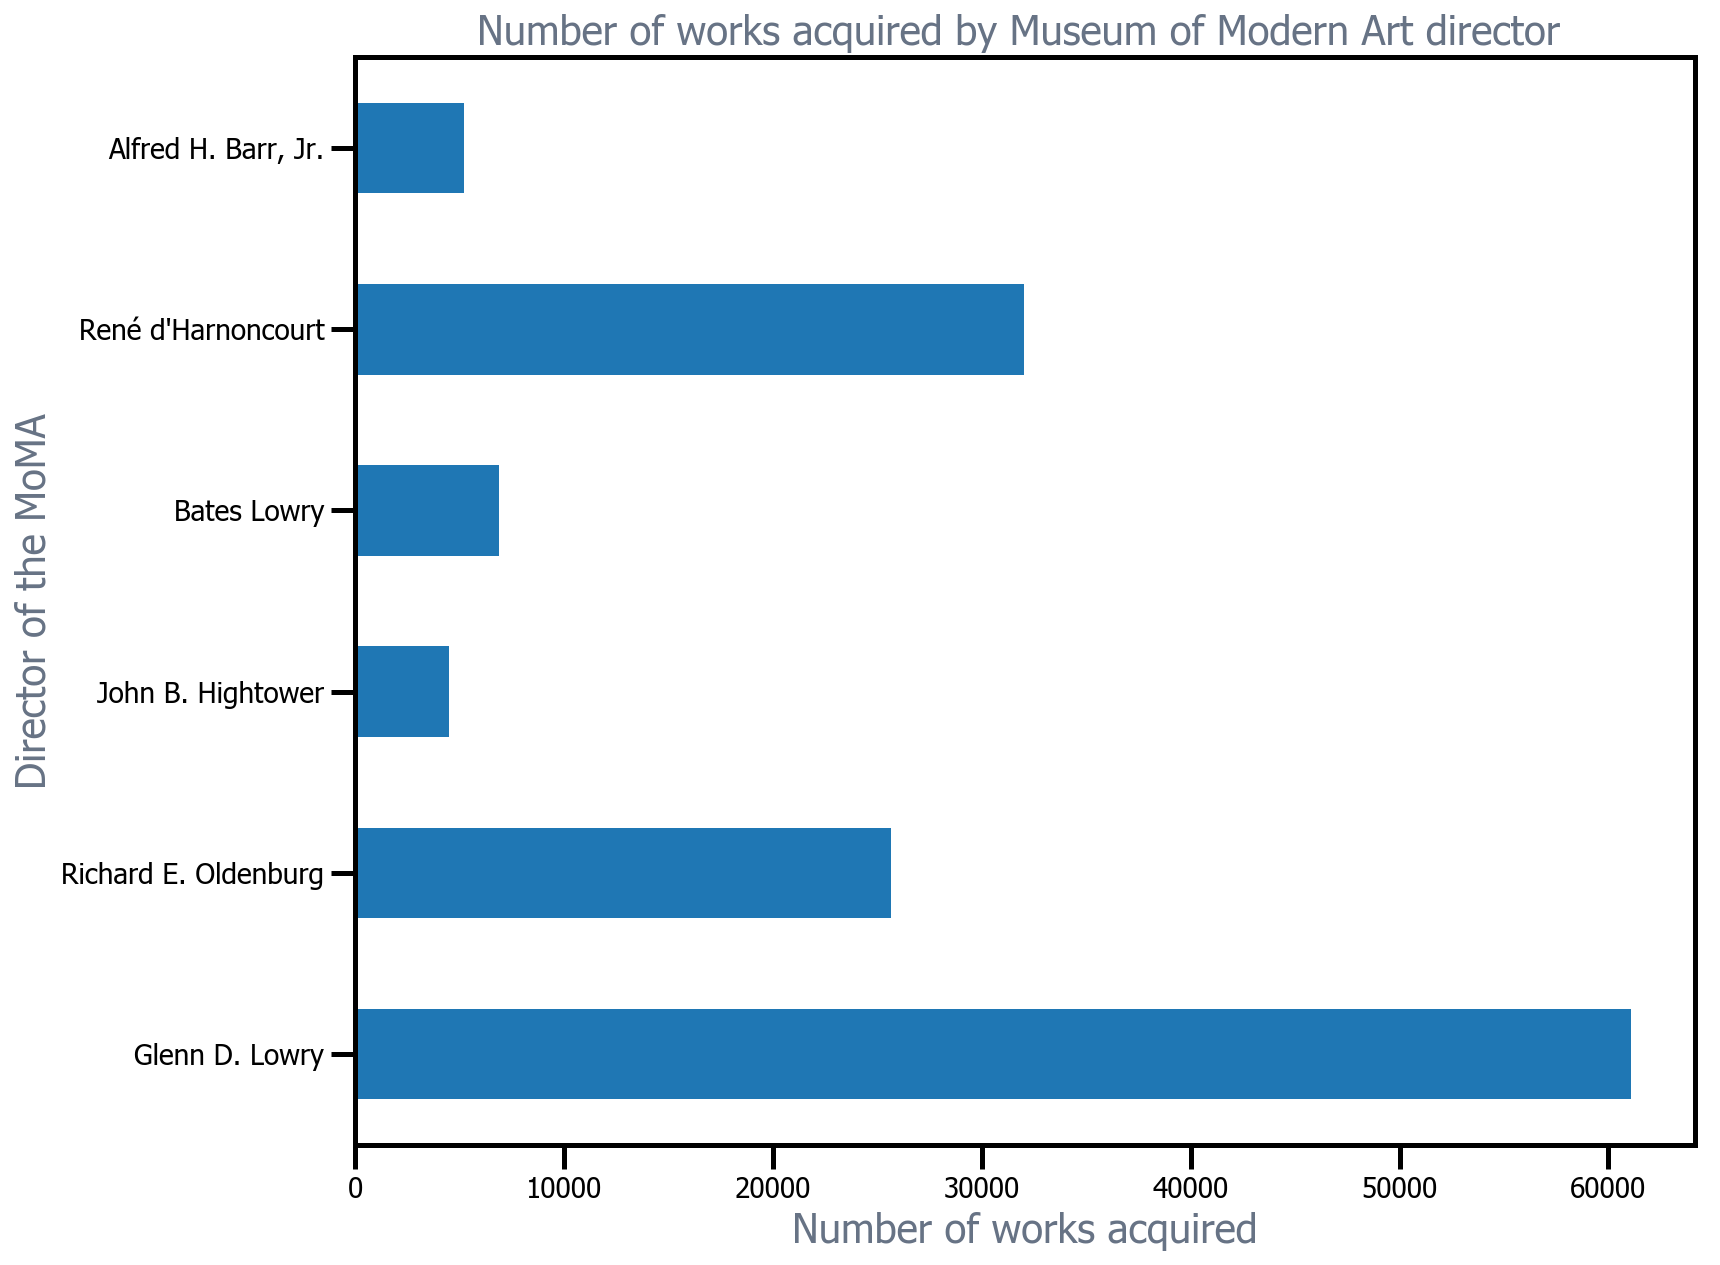

In [31]:
fig, ax = plt.subplots(figsize=(12,10))
ax = directors.sort_values(by="PositionBeginYear", ascending=False)[["NumberWorksAcquired"]].plot(kind='barh', ax=ax, legend=None)
ax.set_xlabel("Number of works acquired");
ax.set_ylabel("Director of the MoMA");
ax.set_title("Number of works acquired by Museum of Modern Art director ");

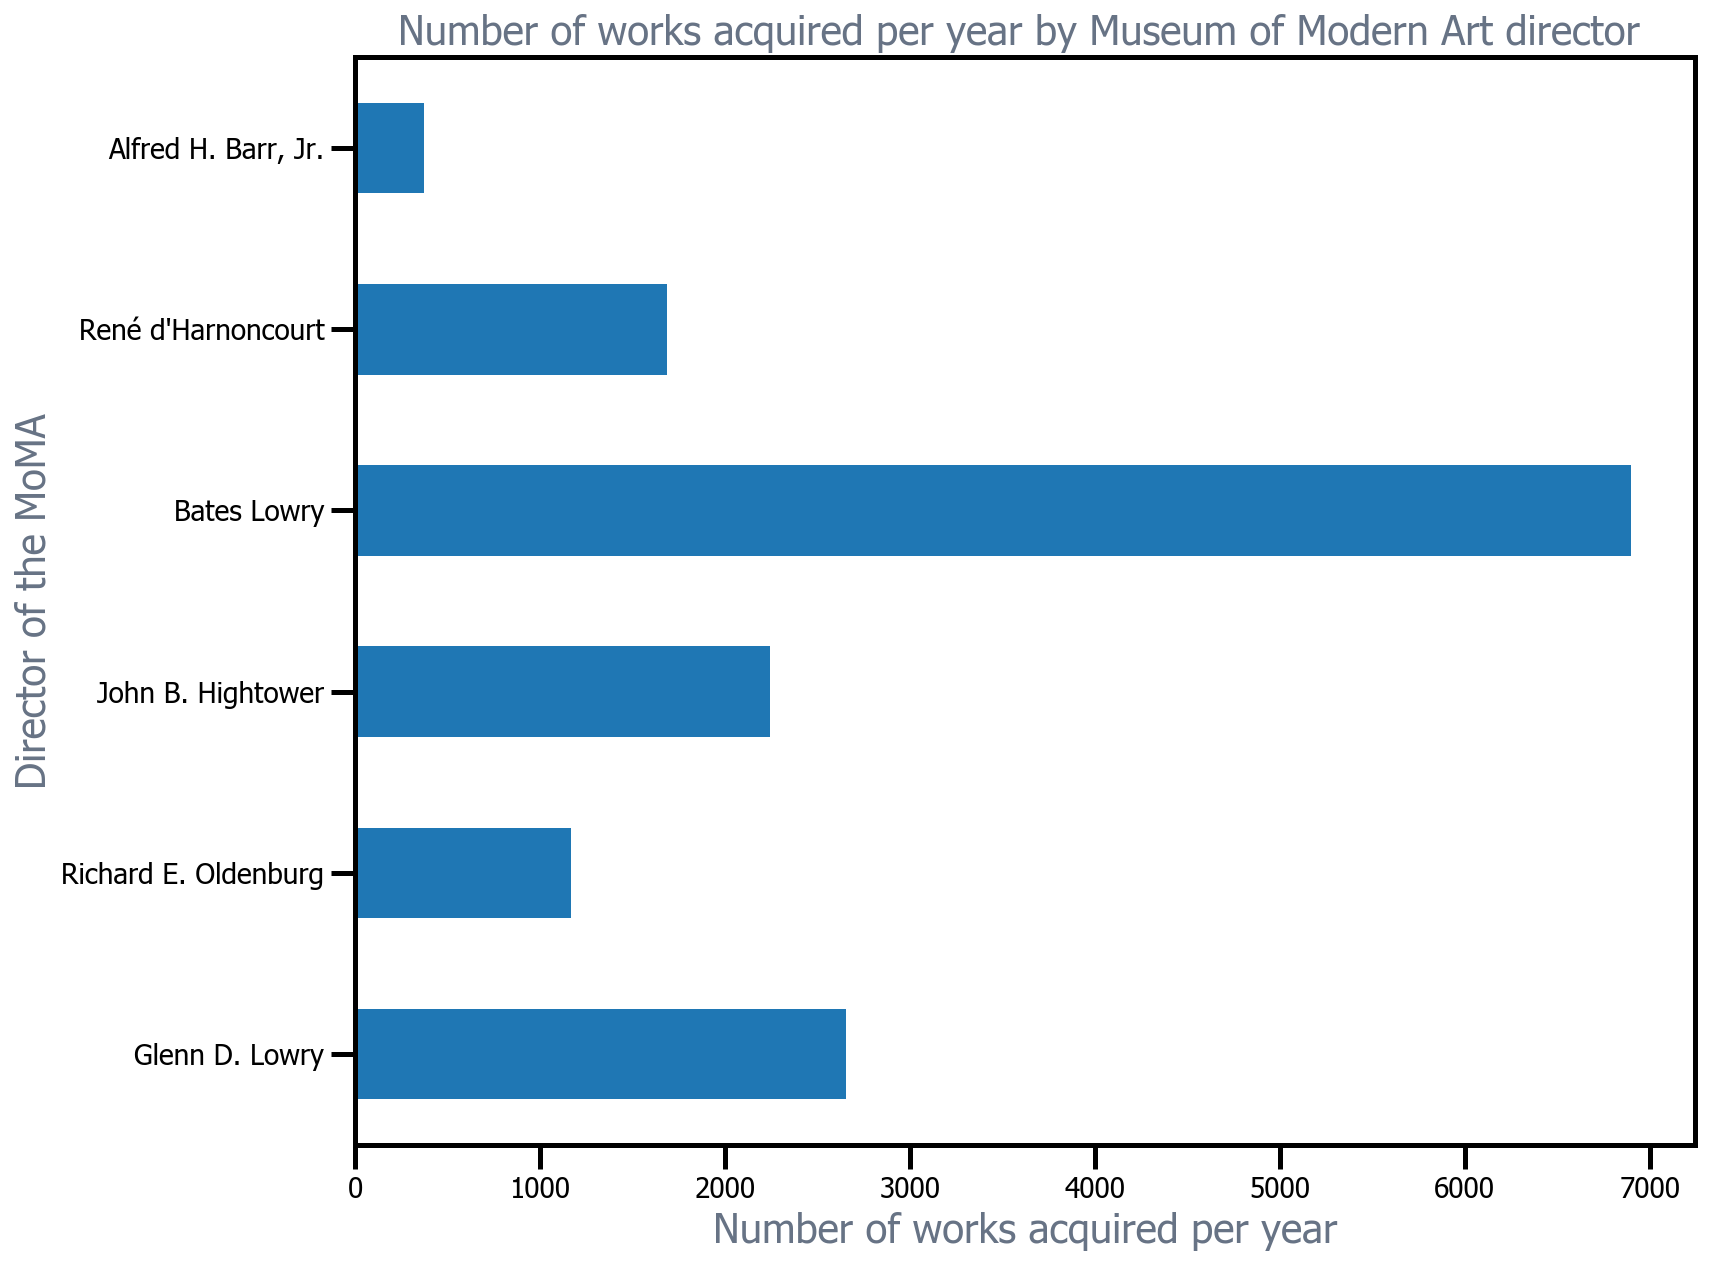

In [32]:
fig, ax = plt.subplots(figsize=(12,10))
ax = directors.sort_values(by="PositionBeginYear", ascending=False)[["NumberWorksPerYear"]].plot(kind='barh', ax=ax, legend=None)
ax.set_xlabel("Number of works acquired per year");
ax.set_ylabel("Director of the MoMA");
ax.set_title("Number of works acquired per year by Museum of Modern Art director ");

## Gender x Director

### Unpacking gender for artworks with multiple artists

In [33]:
works["num_males"] = works.Gender.apply(lambda x: str(x).lower().count("(male)"))
works["num_females"] = works.Gender.apply(lambda x: str(x).lower().count("(female)"))

In [34]:
works["frac_males"] = works.num_males.divide(works.num_males + works.num_females)

In [35]:
works["frac_females"] = works.num_females.divide(works.num_males + works.num_females)

In [36]:
frac_female_by_dir = works.groupby("Director").frac_females.mean()

In [37]:
frac_female_by_dir = pd.DataFrame(frac_female_by_dir)

In [38]:
frac_female_by_dir.columns = ["Mean fraction of works acquired by female artist"]

In [39]:
directors["frac_female"] = frac_female_by_dir.loc[directors.index, "Mean fraction of works acquired by female artist"]

In [40]:
ordered_dirs = directors.sort_values(by="PositionBeginYear", ascending=False)[["NumberWorksPerYear", "frac_female"]]

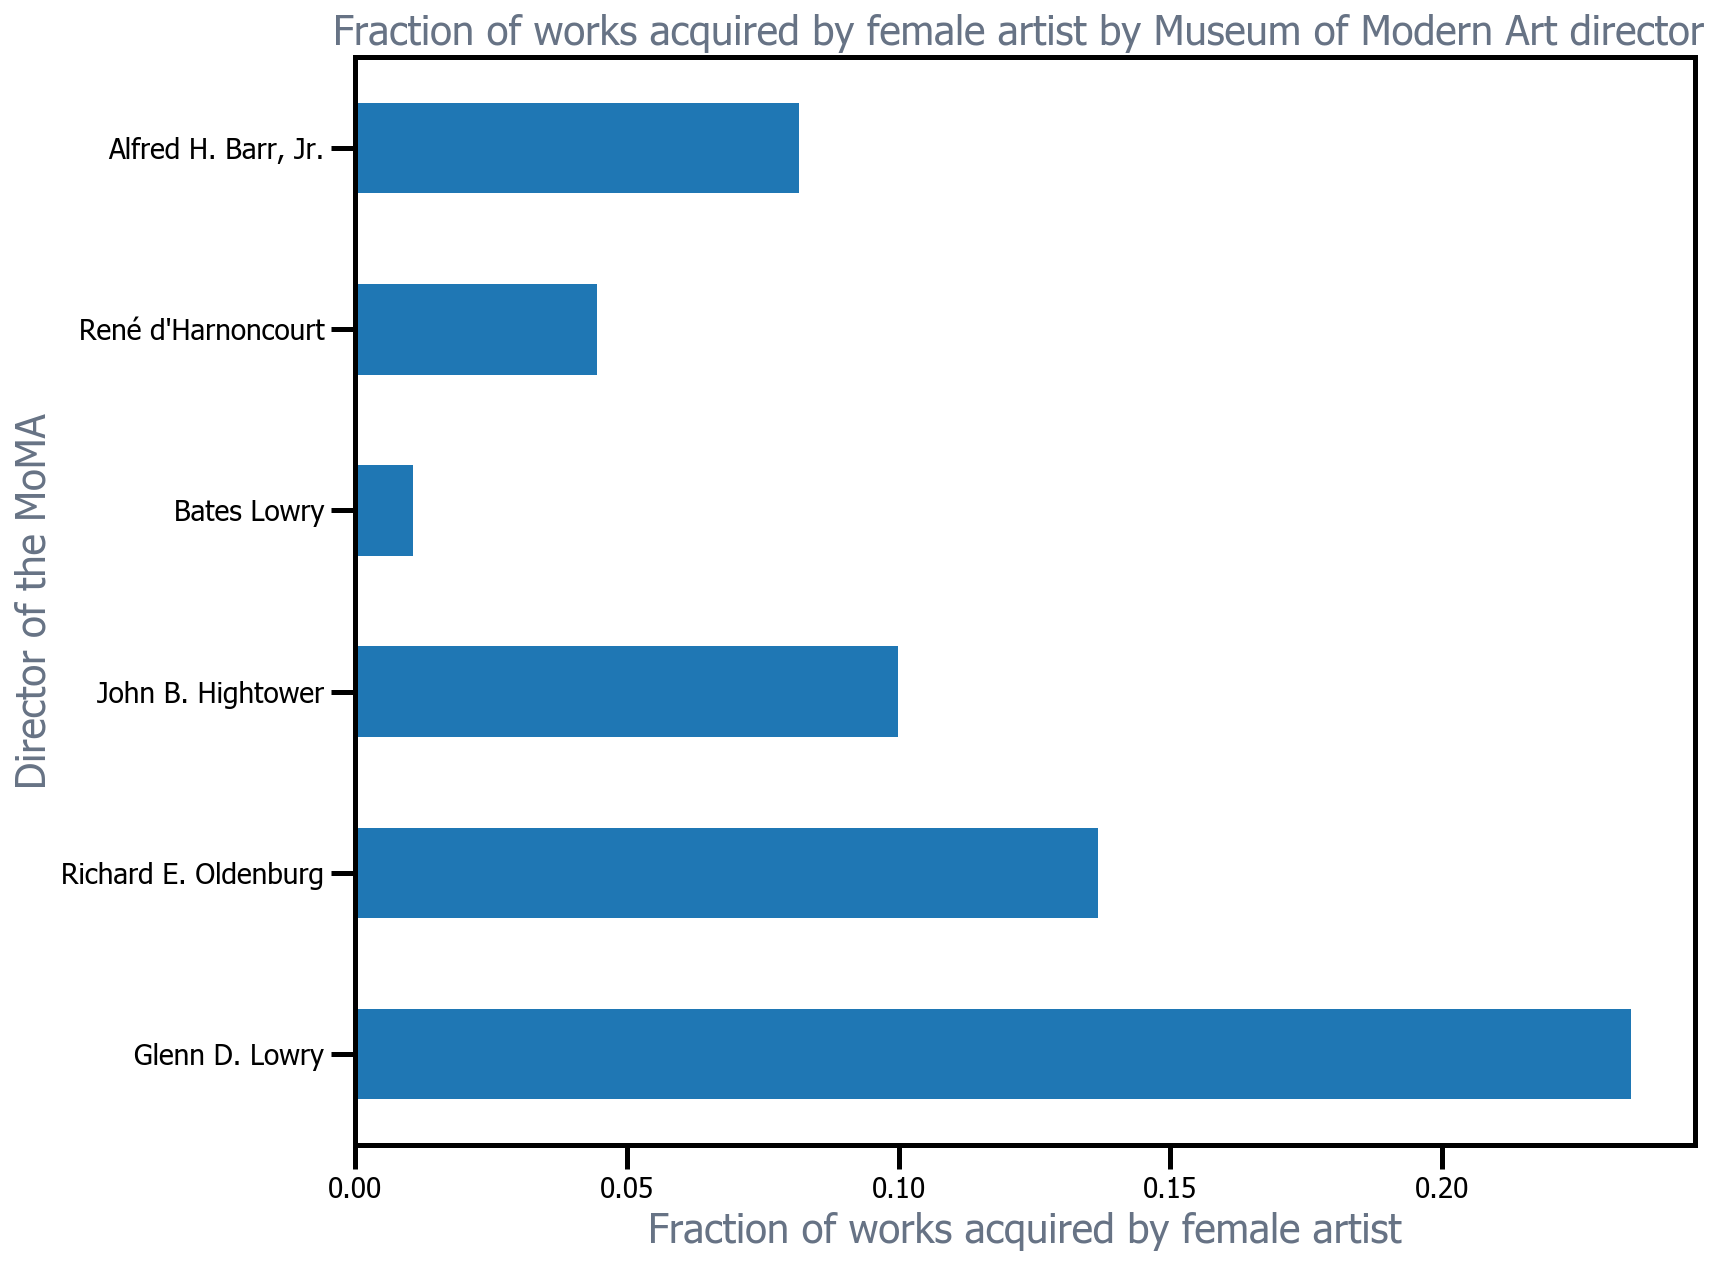

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
ax = directors.sort_values(by="PositionBeginYear", ascending=False)[["frac_female"]].plot(kind='barh', ax=ax, stacked=True, legend=None)
ax.set_xlabel("Fraction of works acquired by female artist");
ax.set_ylabel("Director of the MoMA");
ax.set_title("Fraction of works acquired by female artist by Museum of Modern Art director ");

## Gender x Country

In [44]:
with open(dataplus("nation_to_country_map.yaml"), 'r') as f:
    ntls = yaml.load(f)

#     https://bl.ocks.org/mbostock/raw/4090846/world-110m.json
with open(dataplus("world.json"), 'r') as f:
    world = json.load(f)

In [45]:
ntls["None"] = None

artists['country'] = artists.Nationality.fillna("None").apply(lambda x: ntls[x] if x in ntls else None)

artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,country
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN,United States of America
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN,Spain
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN,United States of America
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0,United States of America
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN,Denmark


In [46]:
ntl_counts = pd.DataFrame(artists[artists.Gender=="Female"].groupby("country").ConstituentID.count())

ntl_counts.columns = ["num_artists_female"]

ntl_counts["num_artists_male"] = artists[artists.Gender=="Male"].groupby("country").ConstituentID.count()

ntl_counts["num_artists"] = artists.groupby("country").ConstituentID.count()

ntl_counts.reset_index(inplace=True)

ntl_counts["frac_female"] = ntl_counts.num_artists_female.divide(ntl_counts.num_artists)

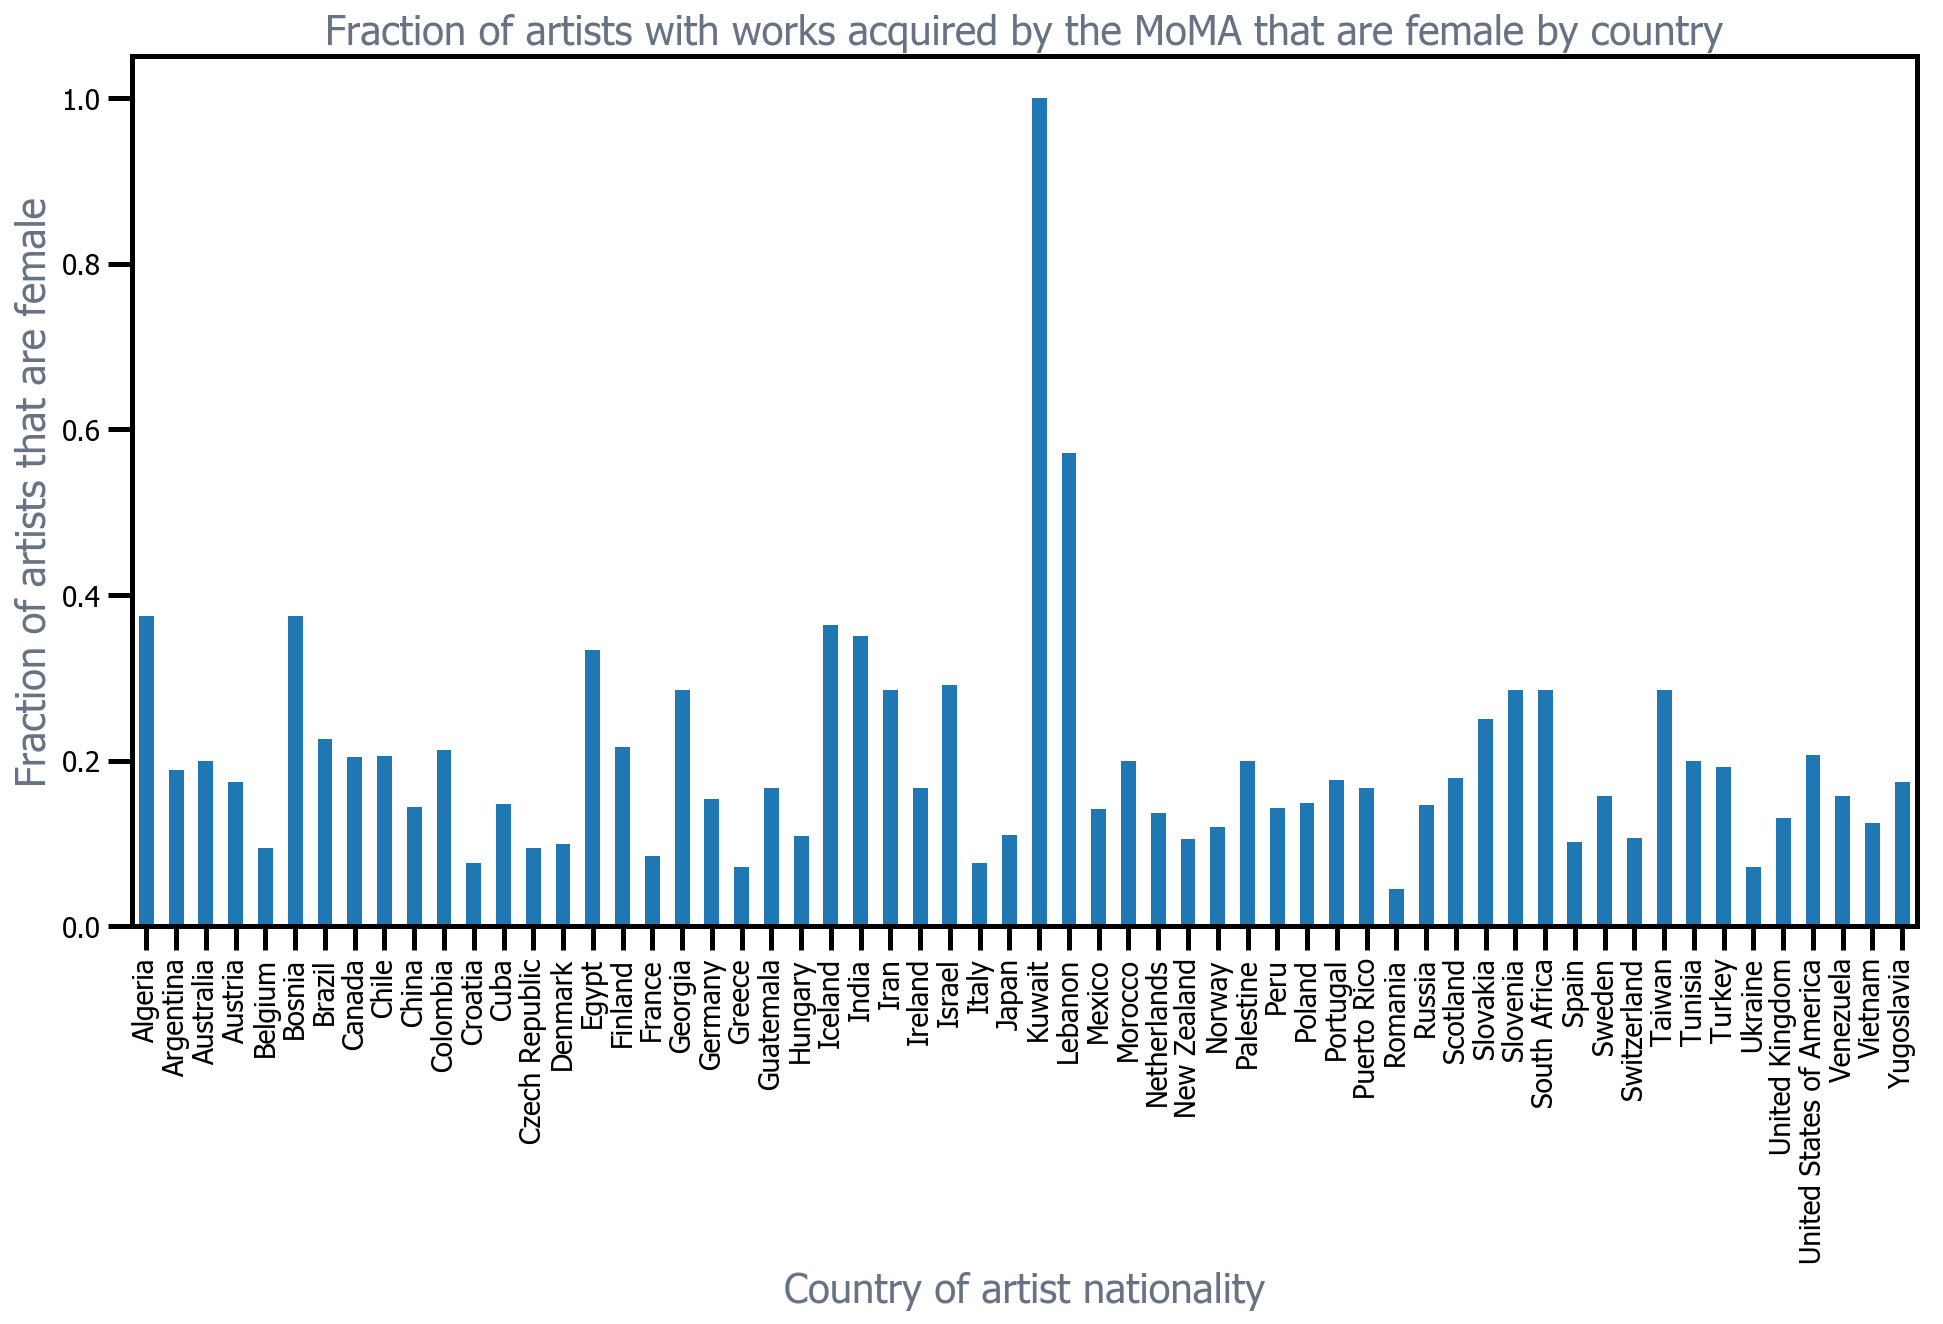

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
ntl_counts[['country', "frac_female"]].set_index('country').plot(kind='bar', ax=ax, legend=None);
ax.set_xlabel('Country of artist nationality');
ax.set_ylabel('Fraction of artists that are female');
ax.set_title('Fraction of artists with works acquired by the MoMA that are female by country');

This loses the geospatial structure.

In [48]:
geo = dataplus('world.json')
mapp = folium.Map(location=[34,-45], zoom_start=2,
                     width=1200, height=600)
mapp.choropleth(geo_data=geo, 
               data=ntl_counts,
               columns=['country', "frac_female"],
               key_on='feature.properties.name', reset=True,
               fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.2,
               threshold_scale = [0, 0.05, 0.1, 0.15, 0.2, 0.25])

In [49]:
mapp

### Artworks

In [50]:
works['Country'] = works.Nationality.fillna("None").apply(lambda x: ntls[x[1:-1]] if x[1:-1] in ntls else None)

In [51]:
ntl_works = pd.DataFrame(works.groupby('Country').frac_females.mean())

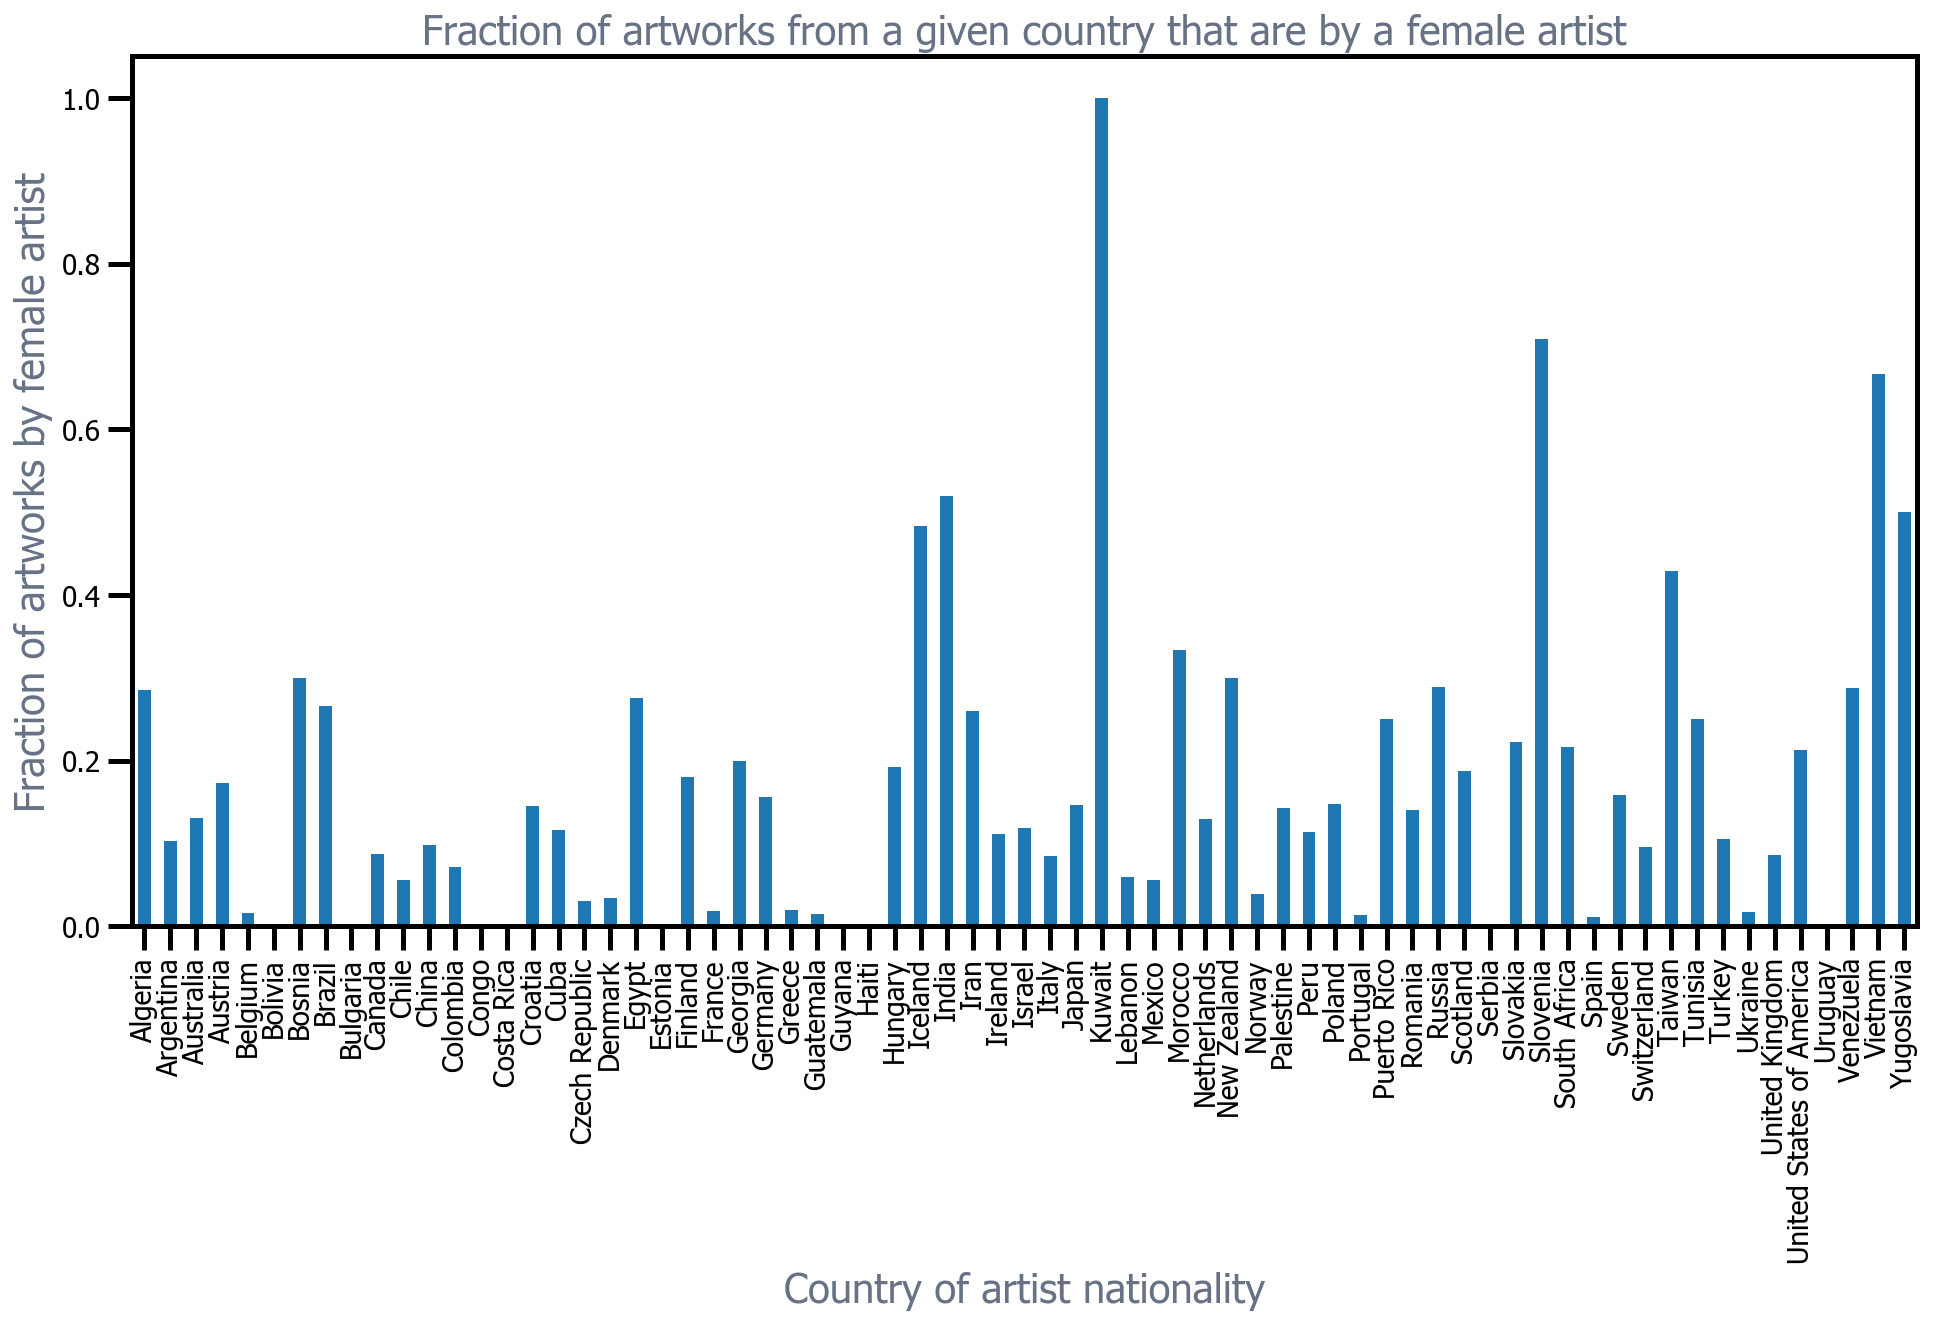

In [52]:
fig, ax = plt.subplots(figsize=(16,8))
ntl_works.plot(kind='bar', ax=ax, legend=None);
ax.set_xlabel('Country of artist nationality');
ax.set_ylabel('Fraction of artworks by female artist');
ax.set_title('Fraction of artworks from a given country that are by a female artist');

In [53]:
geo = dataplus('world.json')
mapp_works = folium.Map(location=[34,-45], zoom_start=2,
                     width=1200, height=600)
mapp_works.choropleth(geo_data=geo, 
               data=ntl_works.reset_index(),
               columns=['Country', "frac_females"],
               key_on='feature.properties.name', reset=True,
               fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.2,
               threshold_scale = [0, 0.05, 0.1, 0.15, 0.2, 0.25])

In [54]:
mapp_works

## Date of creation

In [55]:
def find_years(s):
    if type(s)!=str and np.isnan(s):
        return np.nan, np.nan
    years = re.search("(\d{4})\-(\d{2})", s)
    if years is None:
        years = re.search("(\d{4})", s)
        if years is None:
            return np.nan, np.nan
        else:
            start = years.groups()[0]
            end = start
    else:
        start = years.groups()[0]
        end = start[:1] + years.groups()[1]
    start, end = int(start), int(end)
    return start, end

In [56]:
works['DateClean'] = works.Date.apply(lambda x: find_years(x)[0])

In [57]:
works = works[works.DateClean>1700]

In [58]:
works.DateClean = pd.to_datetime(works.DateClean.astype(int), format="%Y")

### Date of creation over time

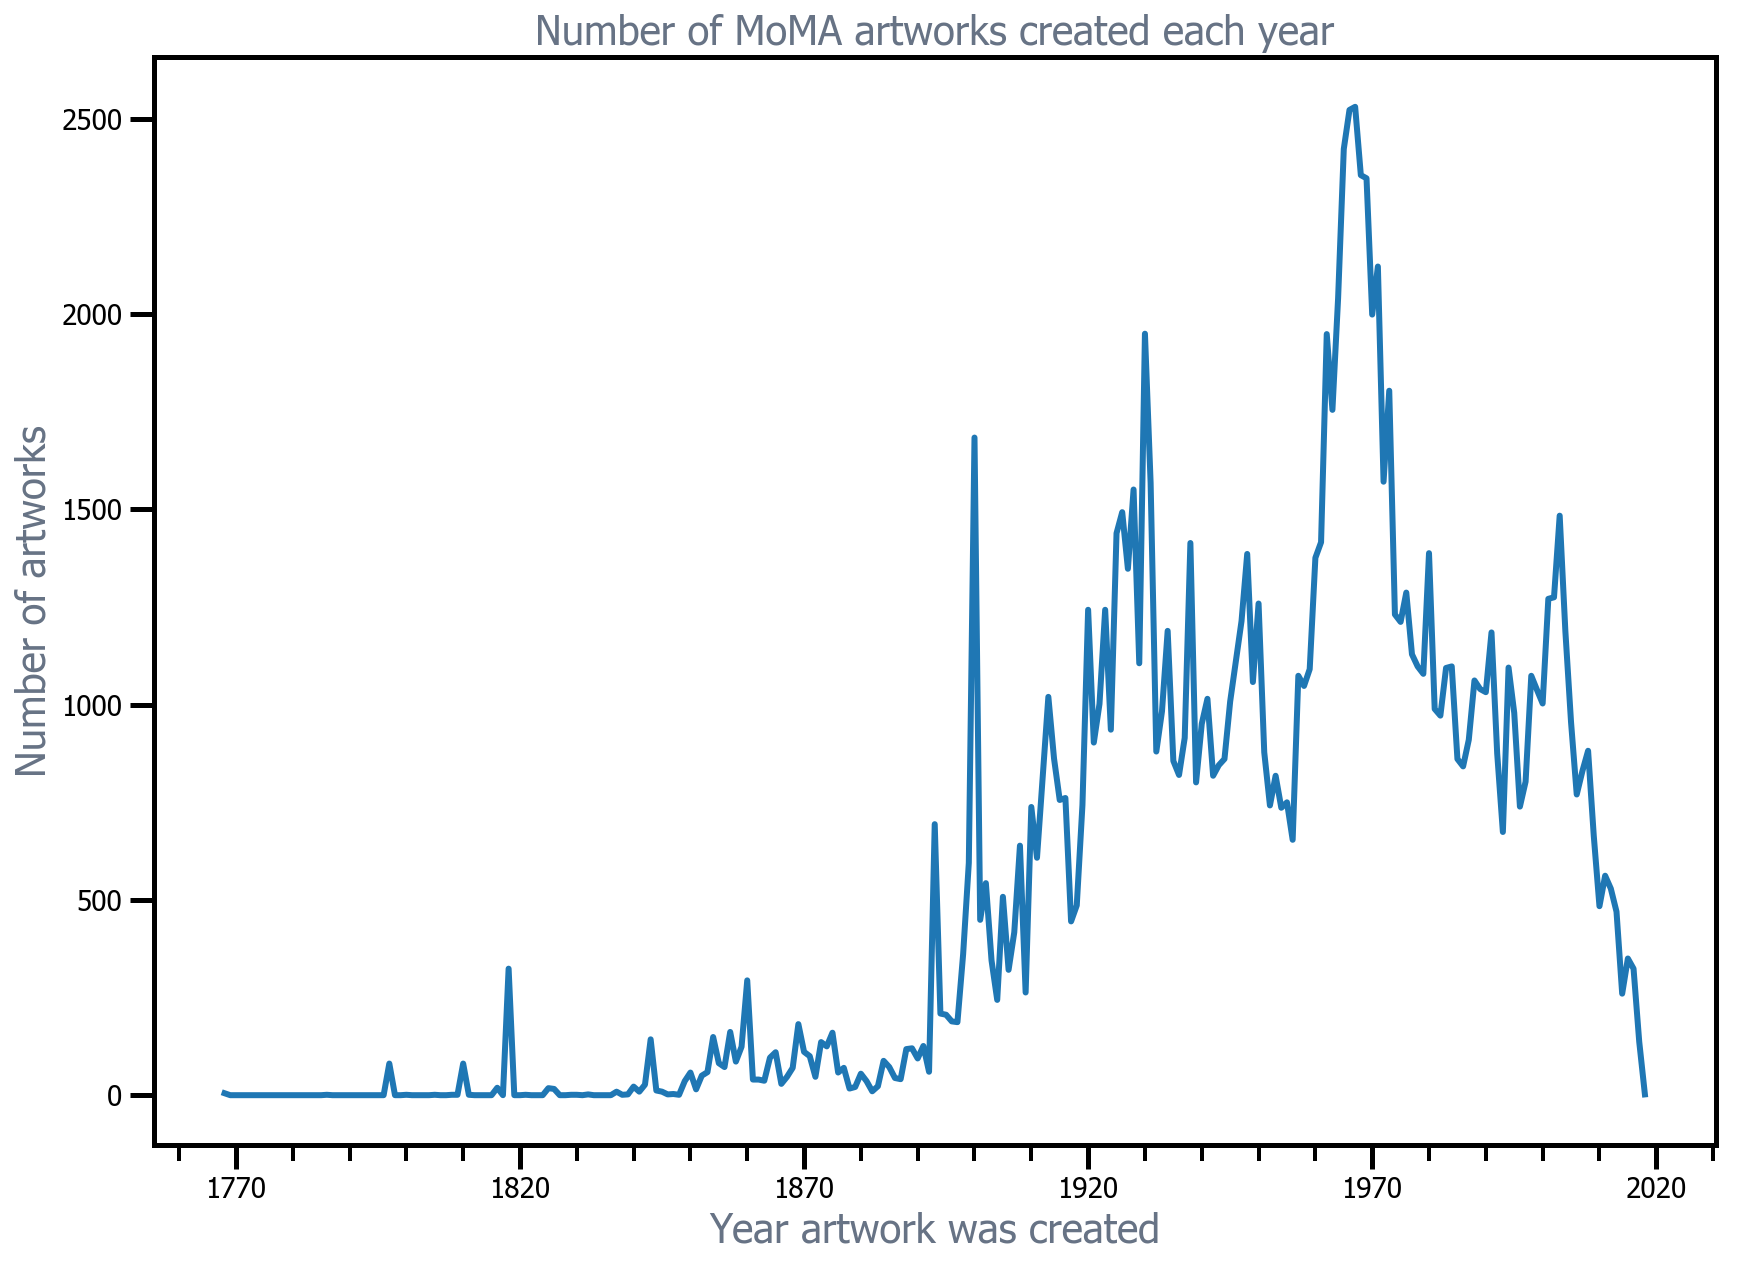

In [59]:
time_group = "Y"
yearly_works = works.groupby(pd.Grouper(key="DateClean",freq=time_group)).ConstituentID.count()

fig, ax = plt.subplots(figsize=(14,10))
ax = yearly_works.plot(ax=ax)
ax.set_xlabel("Year artwork was created")
ax.set_ylabel("Number of artworks")
ax.set_title("Number of MoMA artworks created each year");

### Date of creation x Gender

In [60]:
def get_main_gender(x):
    if x == 1:
        return "female"
    elif x==0:
        return "male"
    else:
        return "both"

In [61]:
works["main_gender"] = works.frac_females.apply(get_main_gender)

In [62]:
time_group = "Y"
yearly_works_gen = works.groupby([pd.Grouper(key="DateClean",freq=time_group), "main_gender"]).ConstituentID.count()

yearly_works_gen = yearly_works_gen.unstack().fillna(0)

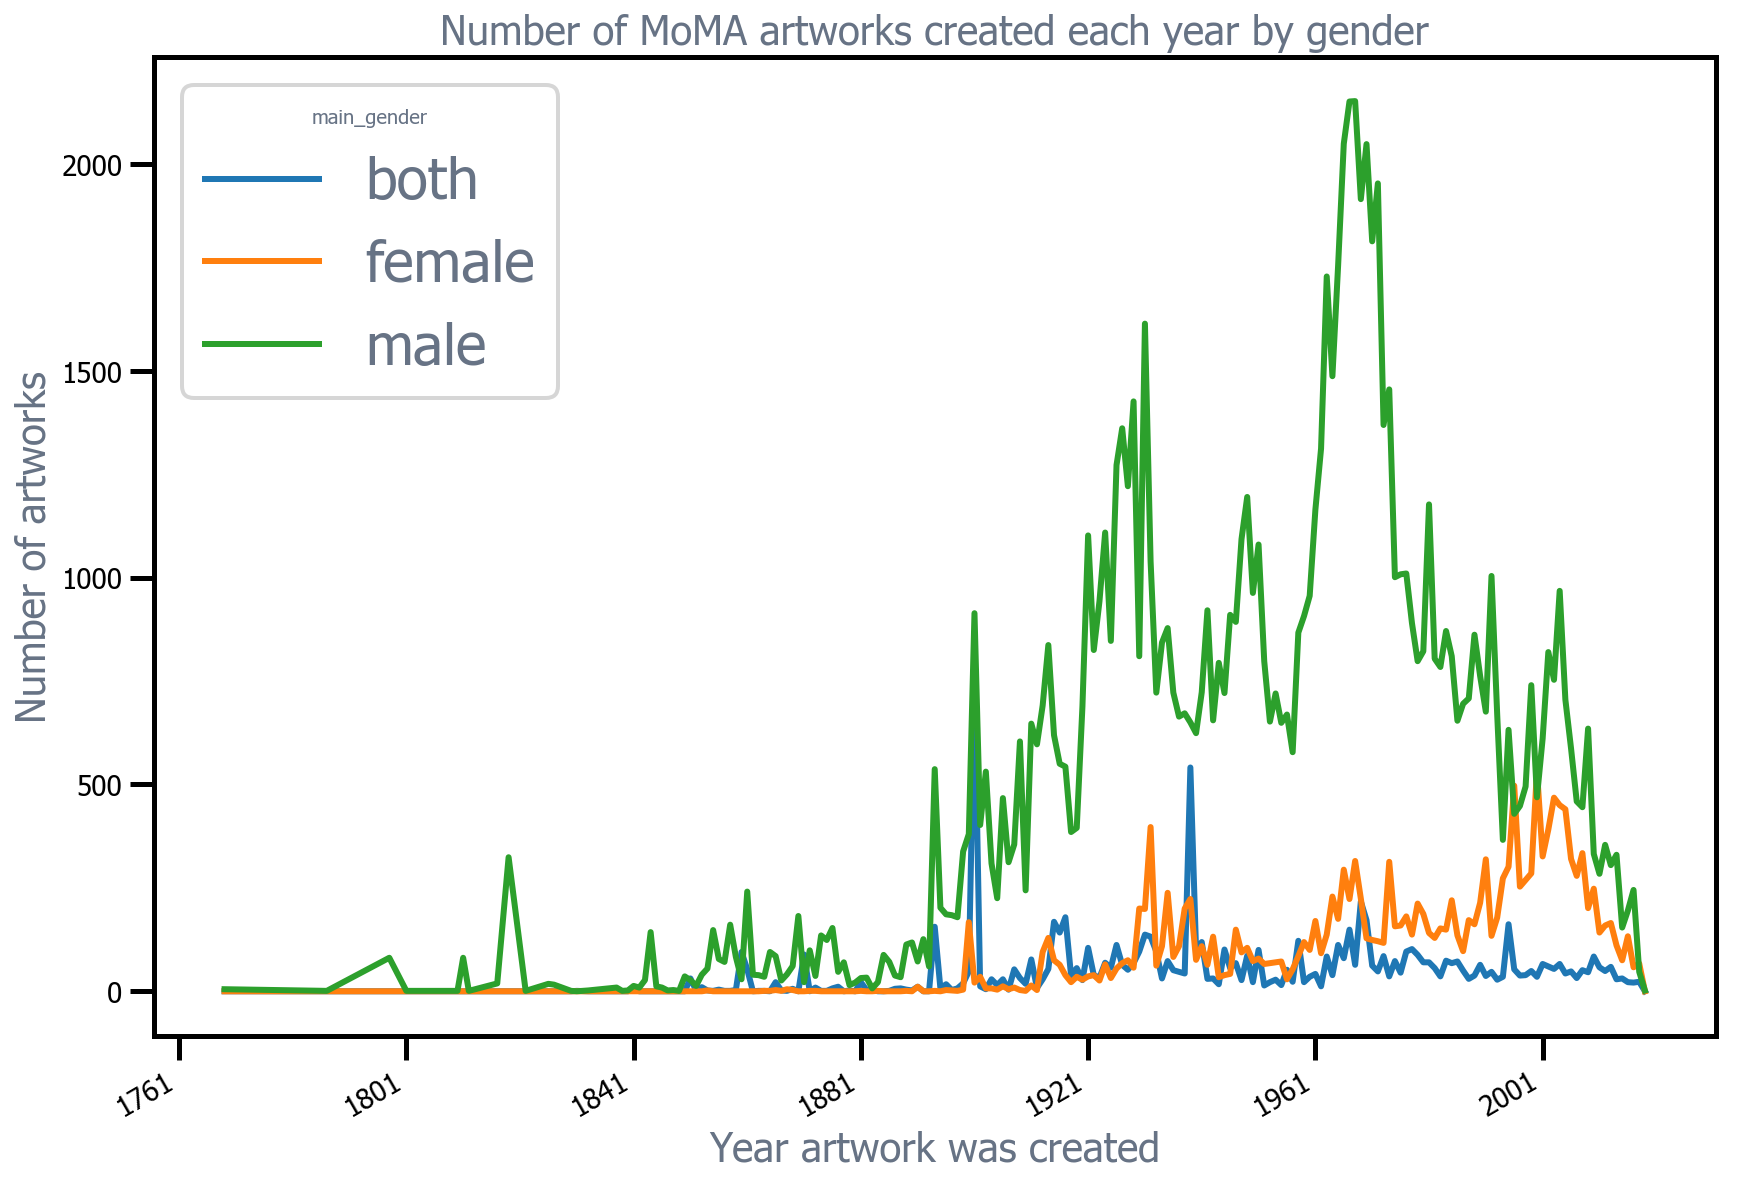

In [63]:
fig, ax = plt.subplots(figsize=(14,10))
ax = yearly_works_gen.plot(ax=ax)
ax.set_xlabel("Year artwork was created")
ax.set_ylabel("Number of artworks")
ax.set_title("Number of MoMA artworks created each year by gender");

In [64]:
works["DateYear"] = works.DateClean.apply(lambda x: x.year)

In [65]:
works["DateYearAcquired"] = works.DateAcquired.apply(lambda x: x.year)